### Correlação tipo de uva com a nota

- Tipo de uva com melhores notas


- Tipo de uva com piores notas


### Correlação tipo de uva com o preço

- Tipo de uva com vinhos mais caros


- Tipo de uva com vinhos mais baratos

### Classificação do Wine Enthusiast

98–100 Classic The pinnacle of quality. 

94–97 Superb A great achievement. 

90–93 Excellent Highly recommended. 

87–89 Very Good Often good value; well recommended. 

83–86 Good Suitable for everyday consumption; often good value. 

80–82 Acceptable Can be employed in casual, less-critical circumstances.

#### Vamos separar da seguinte maneira:
1. melhores vinhos: nota de 93 a 100
2. vinhos intermediarios: nota de 87 a 93
3. vinhos menos bons: nota de 80 a 87

In [1]:
import pandas as pd
import numpy as np

# abrir dataset filtrado
df = pd.read_csv("wine_filtered.csv",index_col=0)

# pegar apenas as colunas de interesse para esta analise
df_var_points = df[['variety', 'points', 'price']]
df_var_points.head()

variety  points  price
0     White Blend      87    NaN
1  Portuguese Red      87   15.0
2      Pinot Gris      87   14.0
3        Riesling      87   13.0
4      Pinot Noir      87   65.0

In [ ]:
def summary(df):
    s_df = pd.DataFrame(df.dtypes, columns=['Dtype'])
    
    s_df['Nunique'] = df.nunique()
    
    s_df['MissingValue'] = df.isnull().sum()
    
    s_df['Count'] = df.count()
    
    s_df['ZeroValues'] = (df == 0).sum()
    
    print(s_df)
    
summary(df_var_points)

In [2]:
# remover linhas com dado faltando
df_var_points.dropna(axis=0, inplace=True)
summary(df_var_points)

/Users/aliemelo/anaconda3/envs/dps19/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NameError: name 'summary' is not defined

In [3]:
# colocar os pontos numa categoria de 1-6, a depender do intervalo

bins = [79, 82, 86, 89, 93, 97, 101]
names = [1, 2, 3, 4, 5, 6]
df_var_points['points_class'] = pd.cut(df_var_points['points'], bins, labels=names)

df_var_points

/Users/aliemelo/anaconda3/envs/dps19/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


variety  points  price points_class
1                 Portuguese Red      87   15.0            3
2                     Pinot Gris      87   14.0            3
3                       Riesling      87   13.0            3
4                     Pinot Noir      87   65.0            3
5             Tempranillo-Merlot      87   15.0            3
6                       Frappato      87   16.0            3
7                 Gewürztraminer      87   24.0            3
8                 Gewürztraminer      87   12.0            3
9                     Pinot Gris      87   27.0            3
10            Cabernet Sauvignon      87   19.0            3
11                Gewürztraminer      87   30.0            3
12            Cabernet Sauvignon      87   34.0            3
14                    Chardonnay      87   12.0            3
15                      Riesling      87   24.0            3
16                        Malbec      87   30.0            3
17                        Malbec      87   13.0            3
18             Tempranillo Blend      87   28.0            3
19                      Meritage      87   32.0            3
20                     Red Blend      87   23.0            3
21                    Pinot Noir      87   20.0            3
22                   White Blend      87   19.0            3
23                        Merlot      87   22.0            3
24                  Nero d'Avola      87   35.0            3
25                    Pinot Noir      87   69.0            3
26                   White Blend      87   13.0            3
27                  Nero d'Avola      87   10.0            3
28                     Red Blend      87   17.0            3
29                  Chenin Blanc      86   16.0            2
33                     Red Blend      86   50.0            2
34               Sauvignon Blanc      86   20.0            2
...                          ...     ...    ...          ...
129940                Chardonnay      91   36.0            4
129941                Chardonnay      90   20.0            4
129942        Cabernet Sauvignon      90   35.0            4
129943                 Red Blend      90   29.0            4
129944                    Shiraz      90   25.0            4
129945              Chenin Blanc      90   20.0            4
129946                  Riesling      90   17.0            4
129947                 Red Blend      90   20.0            4
129948                    Malbec      90   43.0            4
129949                Chardonnay      90   35.0            4
129950                 Zinfandel      90   35.0            4
129951            Gewürztraminer      90   30.0            4
129952                 Zinfandel      90   22.0            4
129953           Cabernet Merlot      90   25.0            4
129954                Pinot Gris      90   15.0            4
129955                Chardonnay      90   40.0            4
129956  Bordeaux-style Red Blend      90   19.0            4
129957         Tempranillo Blend      90   17.0            4
129958  Bordeaux-style Red Blend      90   35.0            4
129959                Pinot Gris      90   57.0            4
129960                Pinot Noir      90   48.0            4
129961                  Frappato      90   30.0            4
129962              Nero d'Avola      90   40.0            4
129963        Cabernet Sauvignon      90   20.0            4
129965                Pinot Gris      90   28.0            4
129966                  Riesling      90   28.0            4
129967                Pinot Noir      90   75.0            4
129968            Gewürztraminer      90   30.0            4
129969                Pinot Gris      90   32.0            4
129970            Gewürztraminer      90   21.0            4

[111592 rows x 4 columns]

In [14]:
# separar dataframes para cada categoria de nota
df_class_1 = df_var_points.loc[df_var_points['points_class'] == 1]
df_class_2 = df_var_points.loc[df_var_points['points_class'] == 2]
df_class_3 = df_var_points.loc[df_var_points['points_class'] == 3]
df_class_4 = df_var_points.loc[df_var_points['points_class'] == 4]
df_class_5 = df_var_points.loc[df_var_points['points_class'] == 5]
df_class_6 = df_var_points.loc[df_var_points['points_class'] == 6]

In [6]:
from plotly.offline import iplot

from visuals import make_hist

figure = make_hist(df_var_points, x='variety', category='points_class')
iplot(figure)

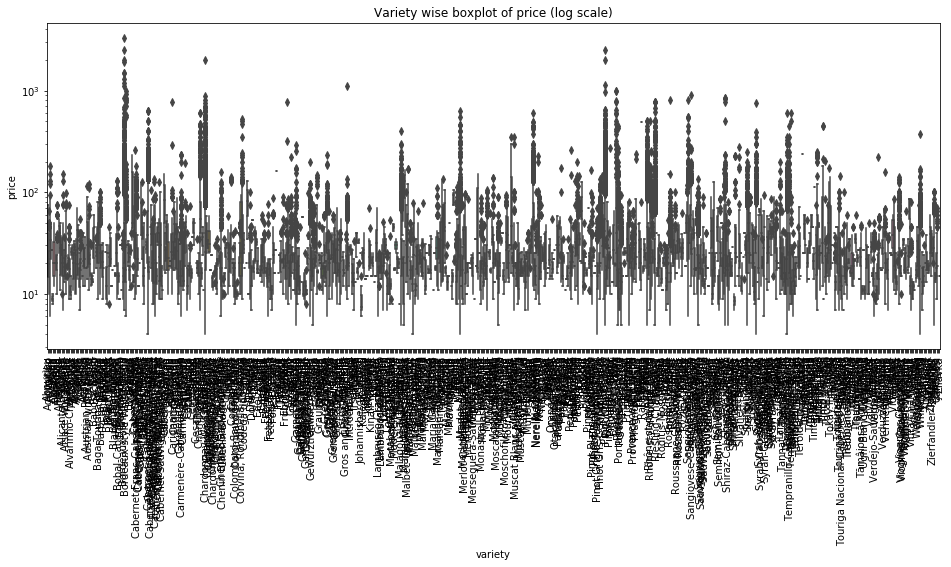

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))
sns.boxplot(x = df_var_points['variety'], y = df_var_points['price'])
plt.yscale("log")
plt.title('Variety wise boxplot of price (log scale)')
plt.xticks(rotation=90);

In [19]:
# Como há muitas variedades, fica impossível analisar qualquer coisa utiliando todas elas..
# então vamos filtrar para as variedades que aparecem com mais frequência

# pegar as 20 variedades mais frequentes e colocar numa lista
top20_freq = df_var_points['variety'].value_counts().head(20)
top20_var = top20_freq.index.values.tolist()

# filtrar dataset para ter apenas as variedades selecionadas
df_top20_var = df_var_points[df_var_points['variety'].isin(top20_var)]

In [22]:
figure = make_hist(df_top20_var, x='variety', category='price')
iplot(figure)

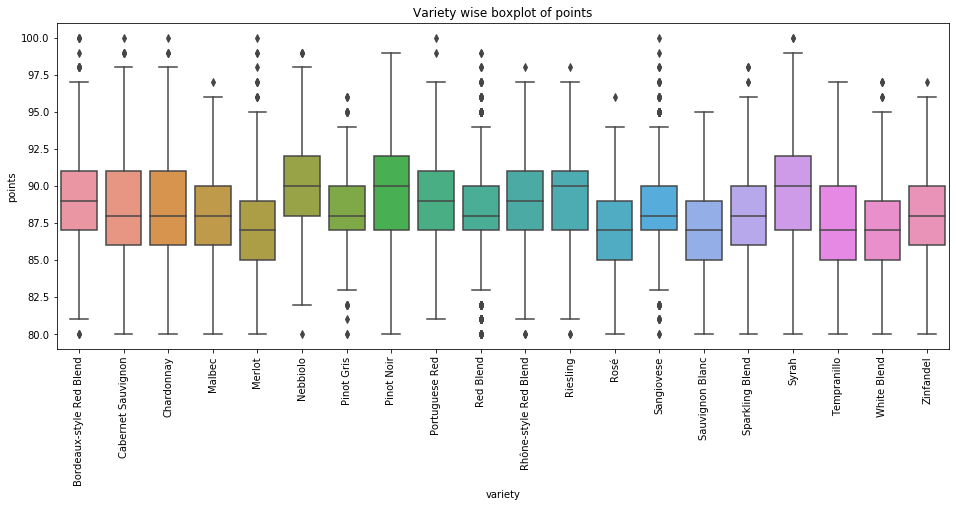

In [60]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df_top20_var['variety'], y = df_top20_var['points'])
plt.title('Variety wise boxplot of points')
plt.xticks(rotation=90);

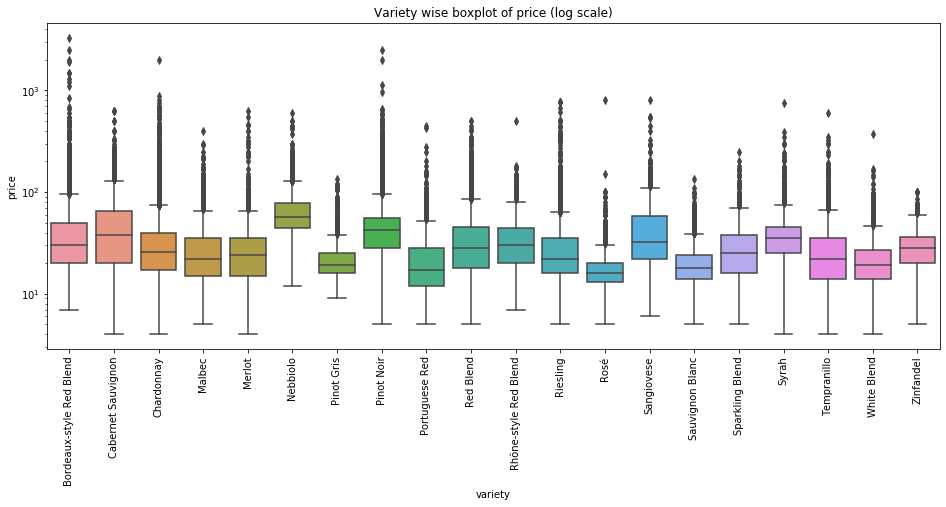

In [25]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df_top20_var['variety'], y = df_top20_var['price'])
plt.yscale("log")
plt.title('Variety wise boxplot of price (log scale)')
plt.xticks(rotation=90);

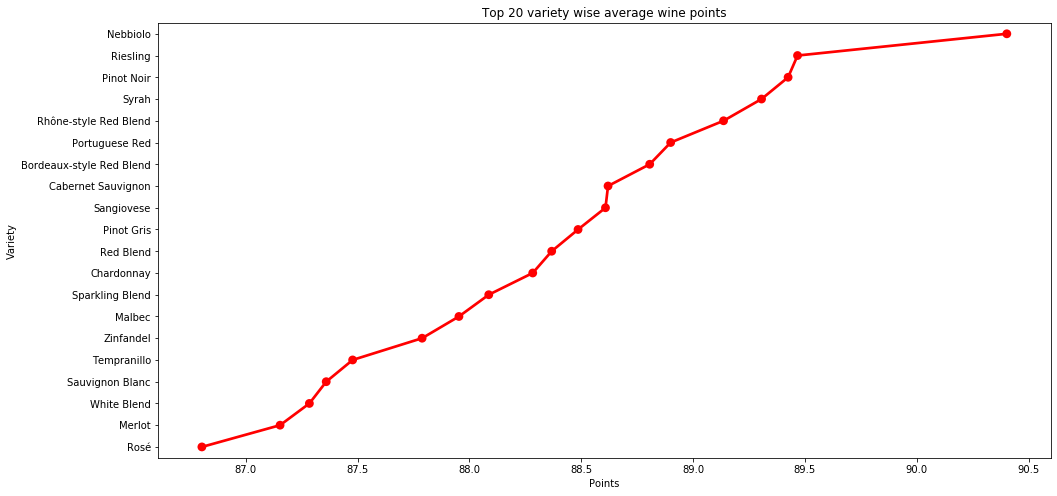

In [53]:
cnt = df_top20_var.groupby(['variety',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Top 20 variety wise average wine points')
plt.xlabel('Points')
plt.ylabel('Variety');

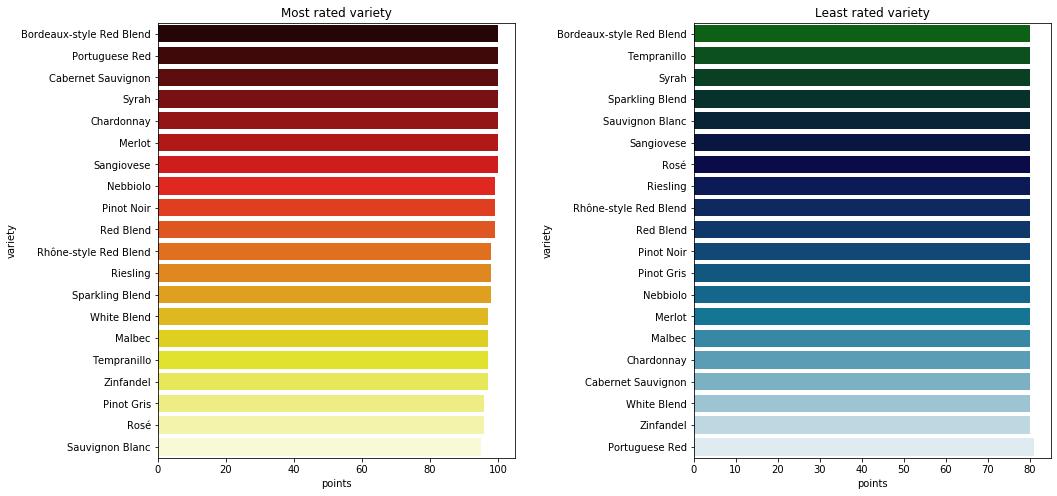

In [57]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df_top20_var.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated variety')

cnt = df_top20_var.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated variety')

plt.subplots_adjust(wspace=0.5);

In [33]:
df_top20_var.head()

variety  points  price points_class
6814   Bordeaux-style Red Blend      88   25.0            3
5858   Bordeaux-style Red Blend      88   19.0            3
50900  Bordeaux-style Red Blend      90   38.0            4
32725  Bordeaux-style Red Blend      90   70.0            4
53232  Bordeaux-style Red Blend      90   40.0            4

In [ ]:
# verificar frequencia com que cada variedade aparece no dataset
df_2['variety'].value_counts()

In [ ]:
print(df_2['variety'].value_counts().describe())

In [ ]:
# remover variedades que só aparecem uma única vez
teste = df_2.groupby('variety').filter(lambda x : (x['variety'].count()>1).any())

In [ ]:
# pegar as 10 variedades mais frequentes
top10_freq = df_2['variety'].value_counts().head(10)
top10_var = top10_freq.index.values.tolist()

In [ ]:
# filtrar dataset para ter apenas as variedades selecionadas

df_top10_var = df_2[df_2['variety'].isin(top10_var)]
df_top10_var.nunique()